Nhóm 01: Entropy

Thành viên nhóm:
-Lưu Võ Tiến Phát
-Phạm Hồng Huy

# Tải dữ liệu.

In [1]:
#personal url https://drive.google.com/file/d/1Xn-aobJLKAq9APYOIENj4kYpk7Ox0NQH/view?usp=sharing
!gdown --id 1Xn-aobJLKAq9APYOIENj4kYpk7Ox0NQH
# -o để force overwrite
!unzip -o house-prices-advanced-regression-techniques.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Xn-aobJLKAq9APYOIENj4kYpk7Ox0NQH
To: /content/house-prices-advanced-regression-techniques.zip
100% 204k/204k [00:00<00:00, 77.0MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
# Tải kết quả tập test
# Personal url https://drive.google.com/file/d/12LFeaeW9QJpEJPUAGxEipEh7h9rY66HU/view?usp=sharing
!gdown --id 12LFeaeW9QJpEJPUAGxEipEh7h9rY66HU

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12LFeaeW9QJpEJPUAGxEipEh7h9rY66HU
To: /content/test_result.csv
100% 17.4k/17.4k [00:00<00:00, 16.3MB/s]


# Import thư viện và các thiết lập cần thiết

In [4]:
#@title Supress scikit-learn warning
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_log_error, make_scorer

# Tiền xử lý
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler

# Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Thư viện scikit-learn cho học máy
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score

# Các mô hình máy học tuyến tính
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV, Lasso

# Mô hình phi tuyến
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, VotingRegressor

from sklearn.model_selection import GridSearchCV

# Mô hình xgb
import xgboost as xgb

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
np.random.seed(1)

# 1.Khám phá dữ liệu

## 1.1 Kích thước các tập

###1.1.1 Tập train

In [22]:
data_df = pd.read_csv('train.csv', index_col=0)
data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Trong phần này nhóm khám phá sơ bộ dữ liệu để xác định các vấn đề có thể gặp phải, cũng như có thể xác hiểu rõ hơn về bài toán sẽ giải quyết.

Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [23]:
# Số dòng X cột của dữ liệu train
data_df.shape

(1460, 80)

### 1.1.2 Tập test

In [24]:
test_X = pd.read_csv('test.csv', index_col=0)
test_y = pd.read_csv('test_result.csv', index_col=0)['SalePrice']
test_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
# Số dòng X cột của dữ liệu test
test_X.shape

(1459, 79)

## 1.2 Khám phá các cột (thuộc tính) của dữ liệu

### 1.2.1 Mỗi cột có ý nghĩa gì?

In [26]:
with open('data_description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Qua mô tả, nhóm có các nhận xét sau:
- Cần lưu ý tại các cột sau vì việc thiếu dữ liệu của các cột này là có chủ đích:
  - `Alley`: kiểu đường hiểm mà căn hộ tiếp xúc => Không tiếp xúc đường hẻm thì sẽ để trống.
  - `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`: các thuộc tính liên quan tới tầng hầm của căn hộ => Không có tầng hầm sẽ để trống.
  - `FireplaceQu`: chất lượng lò sưởi => Không có lò sưởi sẽ để trống.
  - `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`: thuộc tính liên quan tới garage => Không có garage sẽ để trống.
  - `PoolQC`: chất lượng hồ bơi => Không có hồ bơi sẽ để trống.
  - `Fence`: chất lượng hàng rào => Không có hàng rào sẽ để trống.
  - `MiscFeature`: một số tiện nghi khác của căn hộ mà không được liệt kê bởi các thuộc tính trong bảng => Không có sẽ để trống.
- Có một số thuộc tính có dạng multiple choice -> cần lưu ý khi onehot

Các kiểu dữ liệu có trong bảng

In [27]:
data_df.dtypes.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

Như vậy trong bảng có xen kẽ giữa 2 kiểu dữ liệu: categorical (phân loại) và numeric (số).

### 1.2.2 Thống kê sơ bộ cho các cột

In [28]:
cat_cols = data_df.dtypes.index[ data_df.dtypes == 'O' ].tolist()
num_cols = data_df.dtypes.index[ data_df.dtypes != 'O' ].tolist()
num_cols.remove('SalePrice')

Thống kê cho các cột có kiểu numeric:



In [29]:
data_df[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Thống kê cho các cột có kiểu categorical:

In [30]:
data_df[cat_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## 1.3 Khám phá cột giá nhà

In [31]:
data_df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

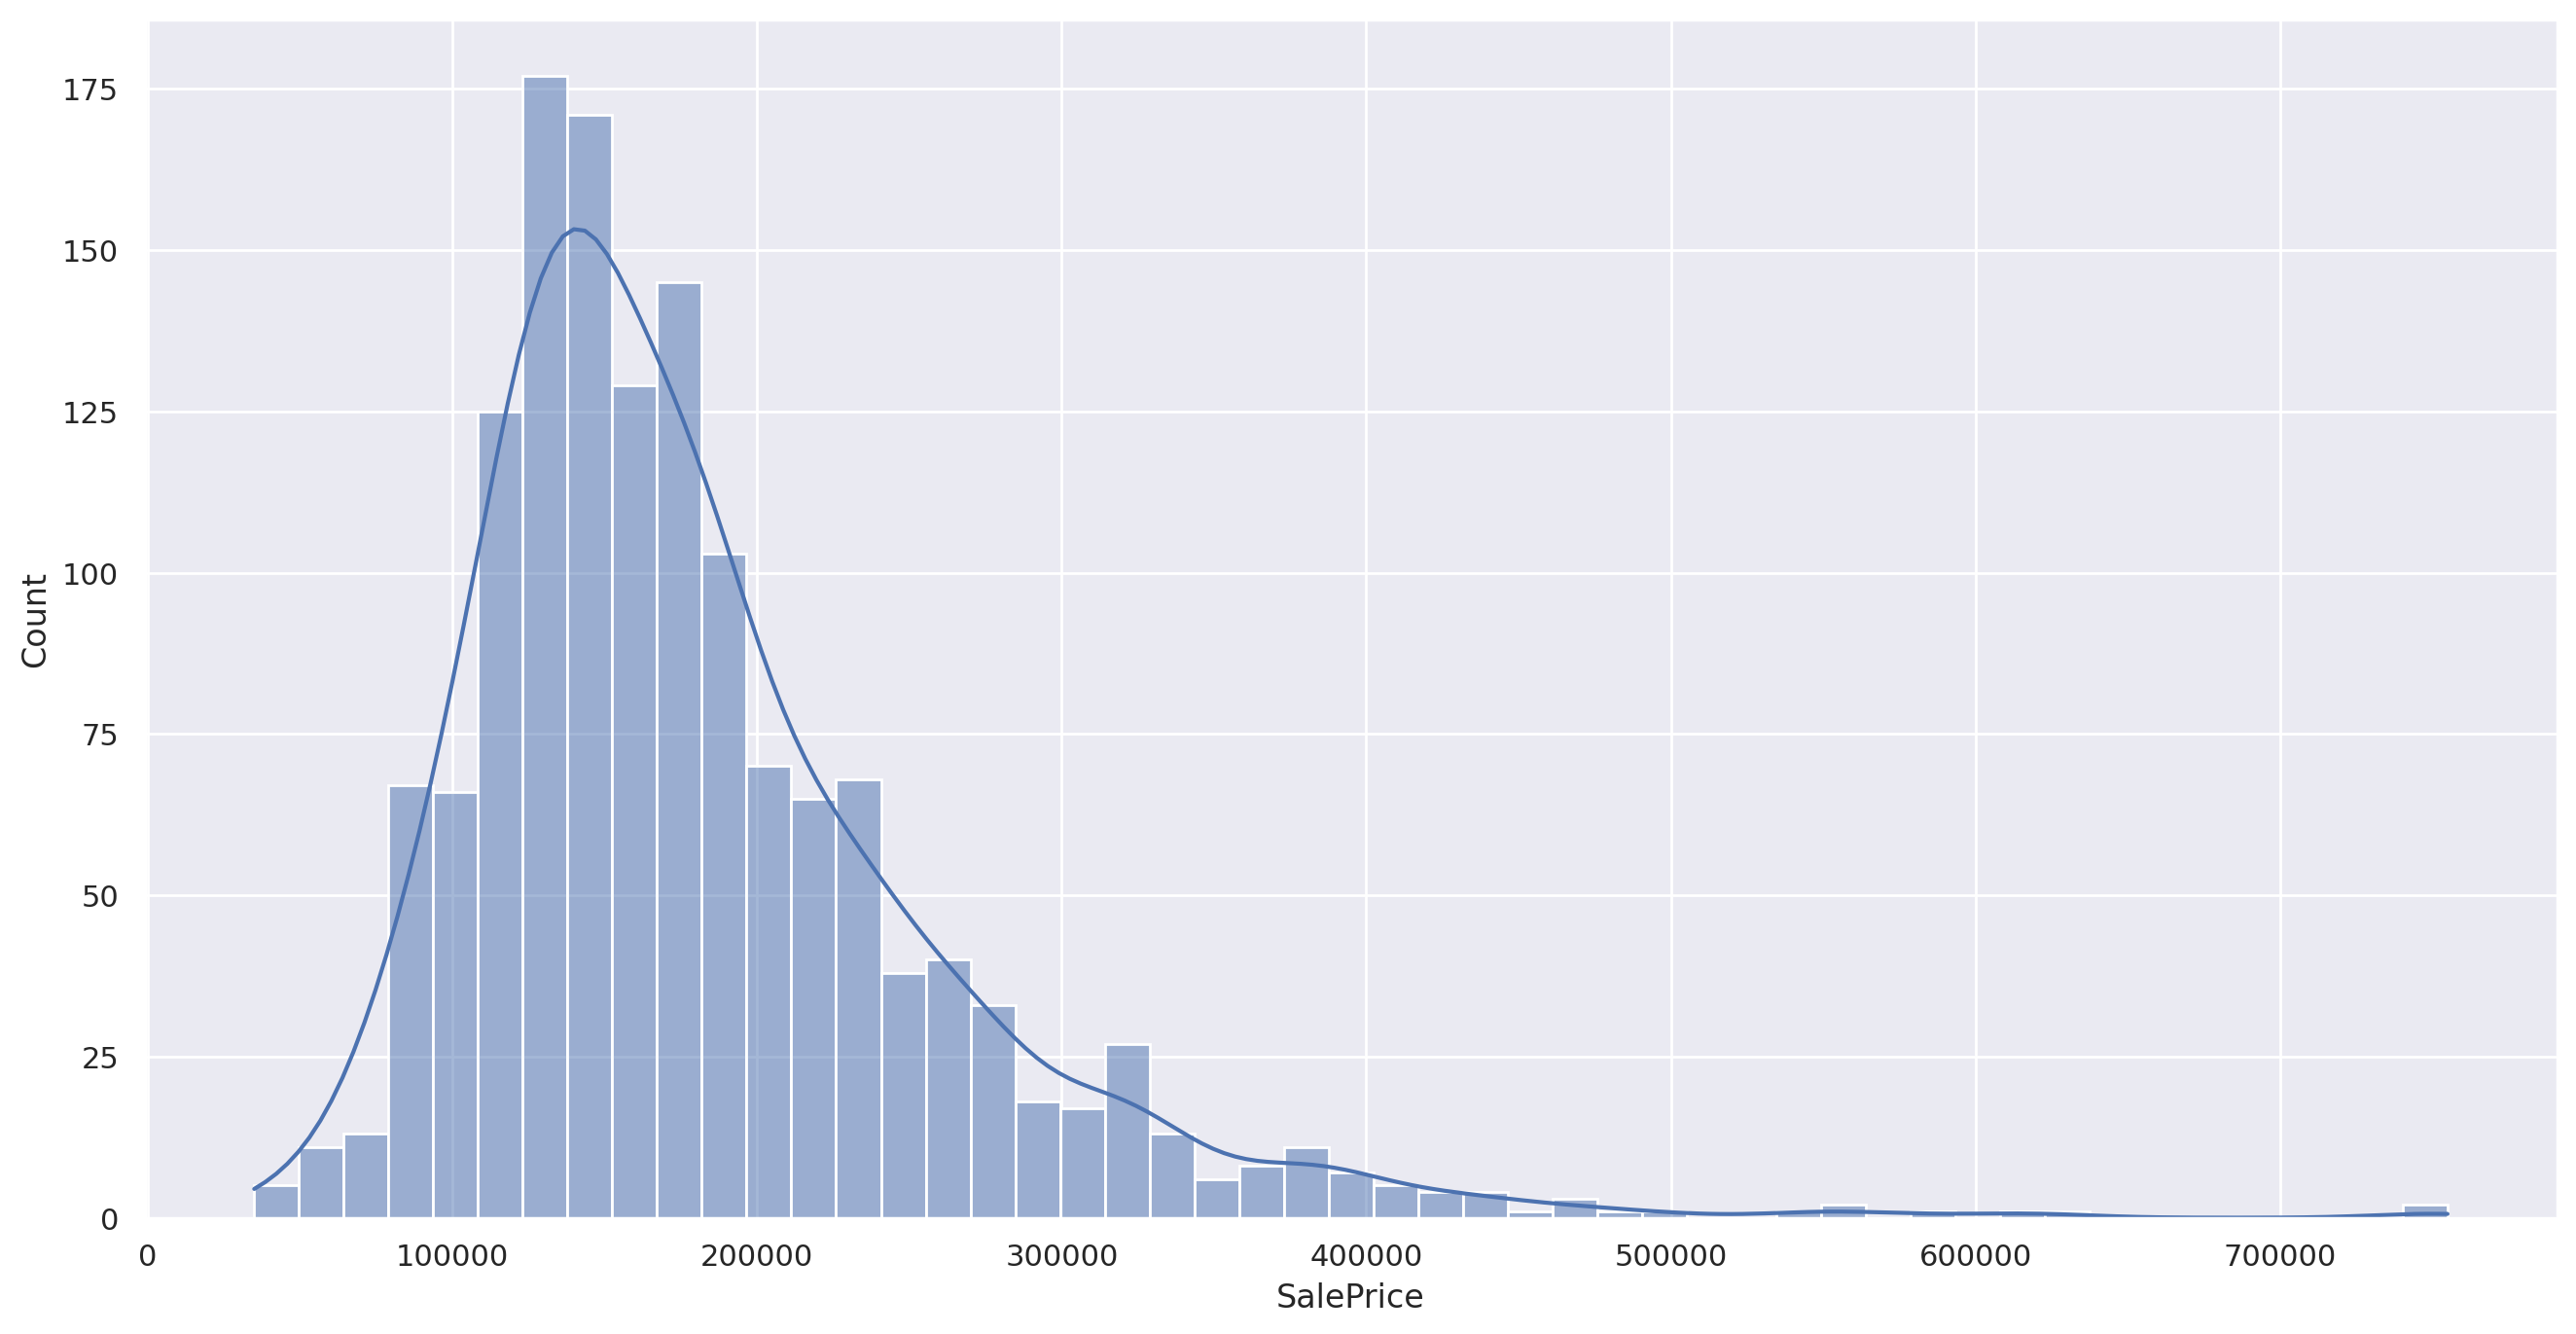

In [32]:
sns.set(rc={'figure.figsize':(16,8)})
sns.histplot(data_df['SalePrice'],kde=True)

In [33]:
print("Skewness: ",round(data_df['SalePrice'].skew(),4))
print("Kurtosis: ",round(data_df['SalePrice'].kurt(),4))

Skewness:  1.8829
Kurtosis:  6.5363


## 1.4 Khám phá dữ liệu thiếu

In [34]:
missing = data_df.isnull().sum()
missing = missing[missing > 0]
missing_stats = pd.DataFrame({
  'Column Name': missing.index,
  'Count': missing.to_list(),
  'Ratio': np.round(missing/data_df.shape[0]*100,2).to_list()
})

In [35]:
cm = sns.light_palette("red", as_cmap=True)
missing_stats.style.background_gradient(cmap=cm)

,Column Name,Count,Ratio
0,LotFrontage,259,17.740000
1,Alley,1369,93.770000
2,MasVnrType,872,59.730000
3,MasVnrArea,8,0.550000
4,BsmtQual,37,2.530000
5,BsmtCond,37,2.530000
6,BsmtExposure,38,2.600000
7,BsmtFinType1,37,2.530000
8,BsmtFinType2,38,2.600000
9,Electrical,1,0.070000


Text(0.5, 0, 'Missing Count')

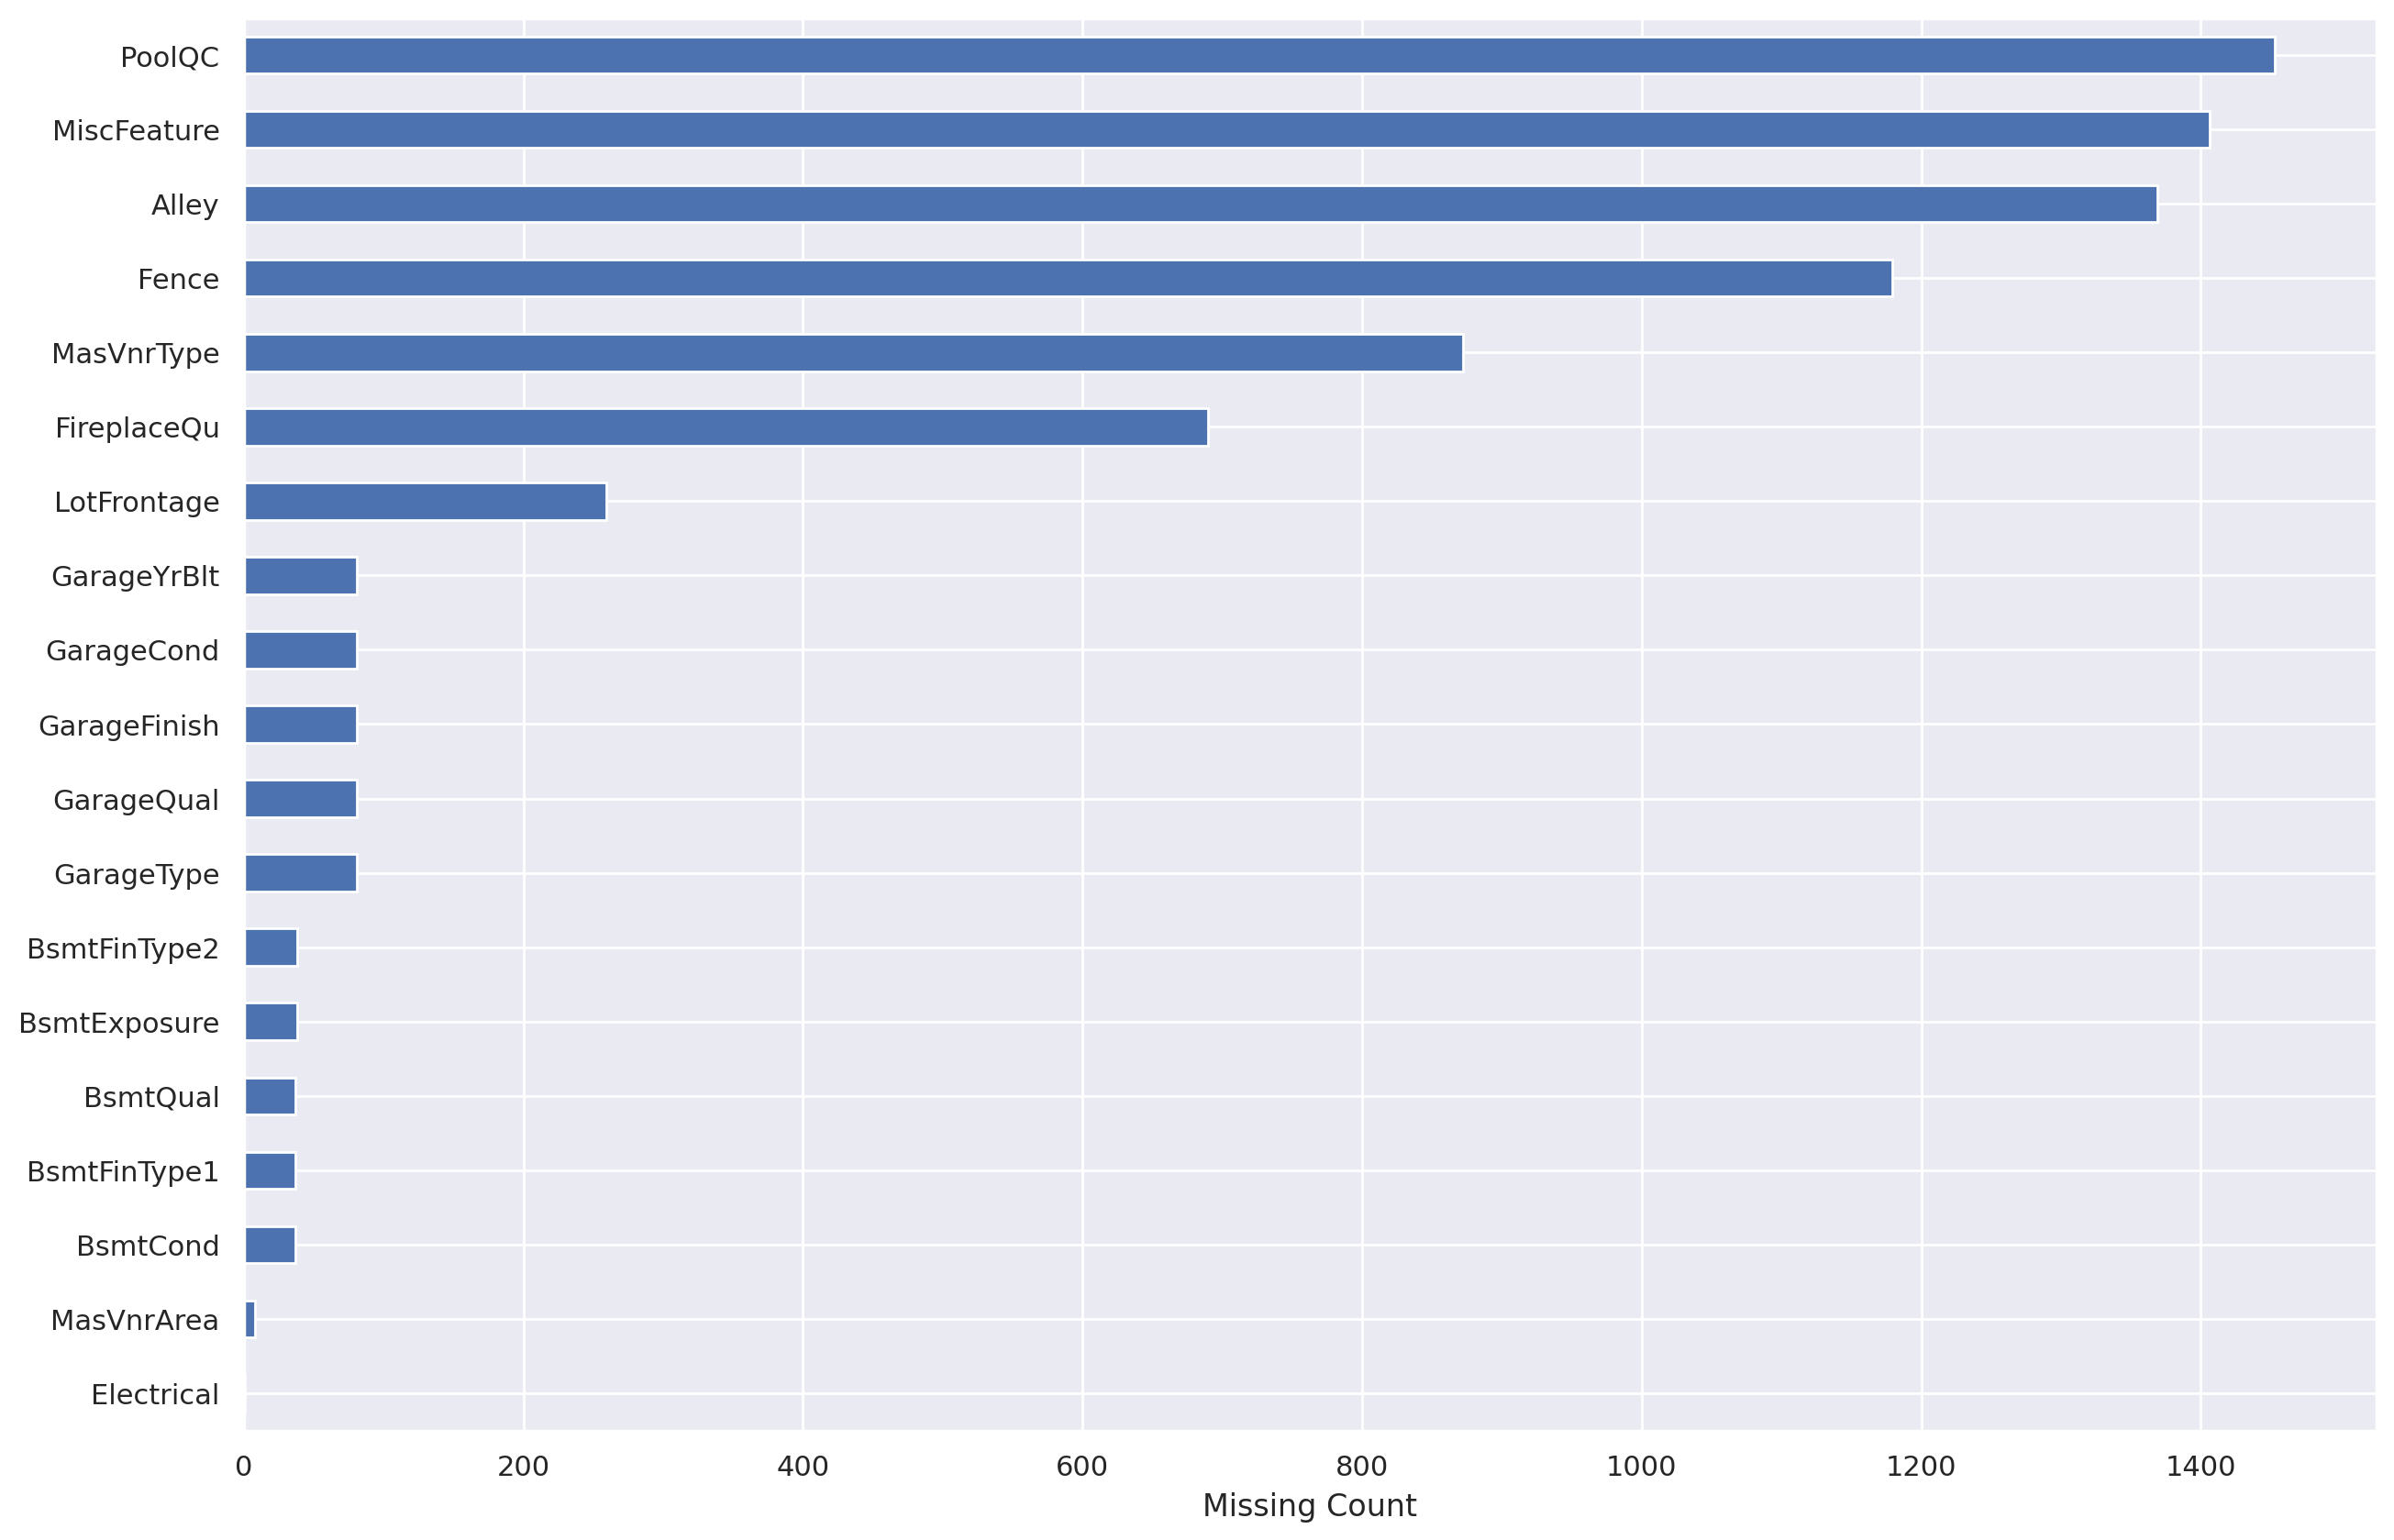

In [36]:
ax = missing.sort_values().plot.barh(figsize=(15,10))
ax.set_xlabel('Missing Count')

Dựa vào những nhận xét từ file mô tả dữ liệu, những dữ liệu thiếu ở đây hầu như đều có chủ đích. Tuy nhiên có một số cột sau không được đề cập ở trên lại xuất hiện:
- `LotFrontage`
- `MasVnrType`, `MasVnrArea`
- `Electrical`

# 2.Preprocess

## 2.1 Log và Exp transformation

In [37]:
test_y = np.log1p(test_y)
data_df["SalePrice"] = np.log1p(data_df["SalePrice"])
data_df["SalePrice"]

,SalePrice
Id,
1,12.247699
2,12.109016
3,12.317171
4,11.849405
5,12.429220
...,...
1456,12.072547
1457,12.254868
1458,12.493133


In [38]:
#biến đổi log cho dữ liệu số bị skewed
numeric_feats = data_df.dtypes[data_df.dtypes != "object"].index

skewed_feats = data_df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats_pos = skewed_feats[(skewed_feats > 0.75)]
skewed_feats_neg = skewed_feats[(skewed_feats < -0.75)]

skewed_feats_pos = skewed_feats_pos.index
skewed_feats_neg = skewed_feats_neg.index

data_df[skewed_feats_pos] = np.log1p(data_df[skewed_feats_pos])
data_df[skewed_feats_neg] = np.expm1(data_df[skewed_feats_neg])
test_X[skewed_feats_pos] = np.log1p(test_X[skewed_feats_pos])
test_X[skewed_feats_neg] = np.expm1(test_X[skewed_feats_neg])

## 2.2 Tách tập


In [39]:
data_X = data_df.drop('SalePrice', axis=1)
data_y = data_df['SalePrice']

In [40]:
train_X, val_X, train_y, val_y = train_test_split(data_X, data_y,test_size=0.3)
train_X.shape, val_X.shape

((1022, 79), (438, 79))

## 2.3 Xây dựng pipeline

In [41]:
mul_cols = ['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinType2']
for col in mul_cols:
  cat_cols.remove(col)

Onehot cho dữ liệu categorical

In [43]:
class OneHotEncoderM(TransformerMixin):
    def __init__(self, *args, **kwargs):
      self.dummy_value = 'MissingValue'
      self.imputer = SimpleImputer(strategy='constant', fill_value=self.dummy_value)
      self.encoder = OneHotEncoder(*args, **kwargs)

    def fit(self, x, y=0):
      self.encoder.fit(self.imputer.fit_transform(x))
      # Remove dummy value from dict
      self.encoder.categories_ = [arr[arr != self.dummy_value] for arr in self.encoder.categories_]
      return self

    def transform(self, x, y=0):
      return self.encoder.transform(x)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MissingValue')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Onehot đặc biệt cho cột dạng multiple choice

In [44]:
class MultiHotEncoder(TransformerMixin):
    def __init__(self, *args, **kwargs):
      self.dummy_value = 'zzMissingzz'
      self.encoder = MultiLabelBinarizer(*args, **kwargs)

    def fit(self, x, y=0):
      self.encoder.fit(x.fillna(self.dummy_value).values)
      # Remove dummy value from dict
      self.encoder.classes_ = self.encoder.classes_[self.encoder.classes_ != self.dummy_value]
      # Remove cached value
      self.encoder._cached_dict = None
      return self

    def transform(self, x, y=0):
      return self.encoder.transform(x.values)

multilabel_transformer =  Pipeline(steps=[
    ('multilabel',MultiHotEncoder())
])

Fill dữ liệu thiếu bằng mean cho numeric

In [45]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, num_cols),
        ('multi_label', multilabel_transformer, mul_cols),
        ('categorical', categorical_transformer, cat_cols)
        ])

preprocess_pipeline=Pipeline(steps=[('preprocessor', preprocessor)])
#,
#                                   ('scaler', StandardScaler(with_mean=True,with_std=True))])

# 3.Mô hình hóa

## 3.1 Thử nghiệm các mô hình

#### Hàm thống kê độ lỗi

In [55]:
#@title Hàm RSMLE
def root_MSLE(y_true, y_pred):
  _y_pred = y_pred
  _y_pred[_y_pred < 0] = 0
  return mean_squared_log_error(y_true, _y_pred)**(1/2)

In [56]:
#@title Hàm thống kê độ lỗi
def error_stats(y, y_pred):
  df = pd.DataFrame({'Actual': np.expm1(y), 'Predicted':np.expm1(y_pred)})
  df['Absolute Error']=df['Actual']-df['Predicted']
  df['Relative Error']=(abs(df['Absolute Error'])/df['Actual'])*100
  MAPE = np.round(df['Relative Error'].mean(), 4)
  RMSLE = root_MSLE(np.expm1(y), np.expm1(y_pred))
  return (df, MAPE, RMSLE)

In [57]:
#@title Hàm TestModel
def TestModel(model):
  test_pred = model.predict(test_X)
  res_df, MAPE, RMSLE = error_stats(test_y, test_pred)
  print(f'RMSLE: {RMSLE}\n\
  MAPE: {MAPE}')

def TestModel_noprep(model, prep_pipe):
  p_test_X = prep_pipe.transform(test_X)
  test_pred = model.predict(p_test_X)
  res_df, MAPE, RMSLE = error_stats(test_y, test_pred)
  print(f'RMSLE: {RMSLE}\n\
  MAPE: {MAPE}')

### 3.1.1 Gradient Boosting

In [58]:
loss=['ls','huber']
alpha=[0.4,0.5,0.7,0.8,0.9,0.95,0.99]
gbr_hyperparam_tuning=pd.DataFrame(columns=['MAPE','RMSLE'])

In [65]:
#@markdown Thử parameter
%%capture
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

gbr_hyperparam_tuning = []
alphas = [0.1, 0.5, 0.8, 0.9]
losses = ['squared_error', 'absolute_error', 'huber', 'quantile']
min_rmse = float('inf')

for loss in losses:
    for alpha in alphas:
        gbr = make_pipeline(preprocess_pipeline,
                            GradientBoostingRegressor(alpha=alpha, loss=loss, random_state=1))
        gbr.fit(train_X, train_y)
        val_pred = gbr.predict(val_X)
        err_df_temp, mrE, RMSE = error_stats(val_y, val_pred)
        if RMSE < min_rmse:
            min_rmse = RMSE
            best_gbr = gbr
            err_df = err_df_temp
        gbr_hyperparam_tuning.append({
            'loss': loss,
            'alpha': alpha,
            'MAPE': mrE,
            'RMSLE': RMSE
        })

gbr_hyperparam_tuning = pd.DataFrame(gbr_hyperparam_tuning)

# Print results
print("Mô hình cho RMSE nhỏ nhất với alpha=0.8 và loss='huber'.\nĐối với tập valuation:")
best_model_row = gbr_hyperparam_tuning[
    (gbr_hyperparam_tuning['alpha'] == 0.8) &
    (gbr_hyperparam_tuning['loss'] == 'huber')
]
if not best_model_row.empty:
    print(f"Độ sai tương đối trung bình: {best_model_row['MAPE'].iloc[0]} %")
    print(f"RMSE: {best_model_row['RMSLE'].iloc[0]}")
    print(err_df.head())
else:
    print("No model found with alpha=0.8 and loss='huber' in gbr_hyperparam_tuning.")
    print("Available columns:", gbr_hyperparam_tuning.columns)
    print(gbr_hyperparam_tuning.head())

In [66]:
gbr_hyperparam_tuning

,loss,alpha,MAPE,RMSLE
0,squared_error,0.1,9.5707,0.136940
1,squared_error,0.5,9.5707,0.136940
2,squared_error,0.8,9.5707,0.136940
3,squared_error,0.9,9.5707,0.136940
4,absolute_error,0.1,10.6233,0.157167
5,absolute_error,0.5,10.6233,0.157167
6,absolute_error,0.8,10.6233,0.157167
7,absolute_error,0.9,10.6233,0.157167
8,huber,0.1,10.6836,0.157996
9,huber,0.5,10.6264,0.155781


In [67]:
print("Mô hình cho RMSE nhỏ nhất với alpha=0.8 và loss='huber'.\nĐối với tập valuation:")
best_model_row = gbr_hyperparam_tuning[
    (gbr_hyperparam_tuning['alpha'] == 0.8) &
    (gbr_hyperparam_tuning['loss'] == 'huber')
]
if not best_model_row.empty:
    print(f"Độ sai tương đối trung bình: {best_model_row['MAPE'].iloc[0]} %")
    print(f"RMSE: {best_model_row['RMSLE'].iloc[0]}")
    print(err_df.head())
else:
    print("No model found with alpha=0.8 and loss='huber' in gbr_hyperparam_tuning.")
    print("Available rows in gbr_hyperparam_tuning:")
    print(gbr_hyperparam_tuning)

Mô hình cho RMSE nhỏ nhất với alpha=0.8 và loss='huber'.
Đối với tập valuation:
Độ sai tương đối trung bình: 10.2397 %
RMSE: 0.1495744222147182
        Actual      Predicted  Absolute Error  Relative Error
Id                                                           
259   231500.0  205140.913811    26359.086189       11.386214
268   179500.0  161917.667271    17582.332729        9.795171
289   122000.0  122473.379172     -473.379172        0.388016
650    84500.0   79430.300530     5069.699470        5.999644
1234  142000.0  141153.966576      846.033424        0.595798


In [68]:
best_gbr.fit(data_X, data_y)
TestModel(best_gbr)

RMSLE: 0.13466858751672336
  MAPE: 8.925


In [69]:
df=pd.DataFrame({'SalePrice':np.expm1(best_gbr.predict(test_X))})
df.index+=1461
df.reset_index(inplace=True)
df.rename({'index':'Id'},inplace=True,axis=1)
df.to_csv('gbr_final.csv',index=False)

### 3.1.2 Ridge

In [70]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
solver = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
ridge_hyperparam_tuning=pd.DataFrame(columns=['MAPE','RMSLE'])

In [72]:
#@markdown Thử parameter
%%capture
min = float('inf')
ridge_hyperparam_tuning = []  # Initialize as a list

for solv in solver:
    for iter_alpha in alphas:
        ridge = make_pipeline(preprocess_pipeline,
                              Ridge(alpha=iter_alpha, tol=0.1, solver=solv))
        ridge.fit(train_X, train_y)
        val_pred = ridge.predict(val_X)
        err_df_temp, mrE, RMSE = error_stats(val_y, val_pred)
        if RMSE < min:
            best_solver = solv
            best_alpha = iter_alpha
            min = RMSE
            err_df = err_df_temp
            best_ridge = ridge
        ridge_hyperparam_tuning.append({
            'solver': solv,
            'alpha': iter_alpha,
            'MAPE': mrE,
            'RMSLE': RMSE
        })

ridge_hyperparam_tuning = pd.DataFrame(ridge_hyperparam_tuning)  # Convert to DataFrame

In [73]:
ridge_hyperparam_tuning.iloc[0:20]

,solver,alpha,MAPE,RMSLE
0,auto,0.05,9.6400,0.132094
1,auto,0.10,9.6514,0.131832
2,auto,0.30,9.6952,0.131733
3,auto,1.00,9.7910,0.133054
4,auto,3.00,9.8508,0.135967
5,auto,5.00,9.8848,0.137461
6,auto,10.00,9.9460,0.139210
7,auto,15.00,10.0018,0.140169
8,auto,30.00,10.1648,0.142222
9,auto,50.00,10.3378,0.144427


In [74]:
print("Mô hình cho RMSE nhỏ nhất với alpha = ",best_alpha," và solver = ",best_solver,".\nĐối với tập valuation:")
print(f"Độ sai tương đối trung bình: {ridge_hyperparam_tuning['MAPE'].iloc[11]} %")
print(f"RMSE: {ridge_hyperparam_tuning['RMSLE'].iloc[11]}")
err_df.head()

Mô hình cho RMSE nhỏ nhất với alpha =  0.3  và solver =  auto .
Đối với tập valuation:
Độ sai tương đối trung bình: 9.64 %
RMSE: 0.1320937538365294


,Actual,Predicted,Absolute Error,Relative Error
Id,,,,
259,231500.0,216981.023181,14518.976819,6.271696
268,179500.0,175524.964628,3975.035372,2.214504
289,122000.0,111870.736628,10129.263372,8.302675
650,84500.0,79209.331836,5290.668164,6.261146
1234,142000.0,128883.424660,13116.575340,9.237025


In [75]:
best_ridge.fit(data_X, data_y)
TestModel(best_ridge)

RMSLE: 0.13223448955140268
  MAPE: 8.7424


In [76]:
df=pd.DataFrame({'SalePrice':np.expm1(best_ridge.predict(test_X))})
df.index+=1461
df.reset_index(inplace=True)
df.rename({'index':'Id'},inplace=True,axis=1)
df.to_csv('ridge_final.csv',index=False)

### 3.1.3 Lasso

In [77]:
alphas = [0.05,0.02,0.01,0.005,0.002,0.001,0.0005,0.0002,0.0001]
lasso_hyperparam_tuning=pd.DataFrame(columns=['MAPE','RMSLE'])

In [79]:
#@markdown Thử parameter
%%capture
min = float('inf')
lasso_hyperparam_tuning = []  # Initialize as a list

for iter_alpha in alphas:
    lasso = make_pipeline(preprocess_pipeline,
                          Lasso(alpha=iter_alpha, random_state=22, max_iter=10000, tol=0.01))
    lasso.fit(train_X, train_y)
    if iter_alpha == 0:
        linear_regression = lasso
    val_pred = lasso.predict(val_X)
    err_df_temp, mrE, RMSE = error_stats(val_y, val_pred)
    if RMSE < min:
        min = RMSE
        err_df = err_df_temp
        best_lasso = lasso
    lasso_hyperparam_tuning.append({
        'alpha': iter_alpha,
        'MAPE': mrE,
        'RMSLE': RMSE
    })

lasso_hyperparam_tuning = pd.DataFrame(lasso_hyperparam_tuning)  # Convert to DataFrame

In [80]:
lasso_hyperparam_tuning

,alpha,MAPE,RMSLE
0,0.0500,14.5673,0.194905
1,0.0200,12.6348,0.173763
2,0.0100,11.9412,0.165825
3,0.0050,10.8432,0.151403
4,0.0020,10.0511,0.141648
5,0.0010,9.7437,0.138291
6,0.0005,9.3272,0.132156
7,0.0002,9.1652,0.127491
8,0.0001,9.2088,0.127201


In [81]:
print("Mô hình cho RMSE nhỏ nhất với alpha=0.0001.\nĐối với tập valuation:")
print(f"Độ sai tương đối trung bình: {lasso_hyperparam_tuning['MAPE'].iloc[8]} %")
print(f"RMSE: {lasso_hyperparam_tuning['RMSLE'].iloc[8]}")
err_df.head()

Mô hình cho RMSE nhỏ nhất với alpha=0.0001.
Đối với tập valuation:
Độ sai tương đối trung bình: 9.2088 %
RMSE: 0.12720116469286225


,Actual,Predicted,Absolute Error,Relative Error
Id,,,,
259,231500.0,215609.946203,15890.053797,6.863954
268,179500.0,182788.195307,-3288.195307,1.831864
289,122000.0,111137.434863,10862.565137,8.903742
650,84500.0,80499.384152,4000.615848,4.734457
1234,142000.0,127152.424099,14847.575901,10.456039


In [82]:
best_lasso.fit(data_X, data_y)
TestModel(best_lasso)

RMSLE: 0.12856798148376528
  MAPE: 8.4262


In [83]:
df=pd.DataFrame({'SalePrice':np.expm1(best_lasso.predict(test_X))})
df.index+=1461
df.reset_index(inplace=True)
df.rename({'index':'Id'},inplace=True,axis=1)
df.to_csv('lasso_final.csv',index=False)

### 3.1.4 XGB

In [84]:
lns = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005]
xgb_hyperparam_tuning=pd.DataFrame(columns=['MAPE','RMSLE'])

In [85]:
p_train_X = preprocess_pipeline.fit_transform(train_X)
p_val_X = preprocess_pipeline.transform(val_X)
p_test_X = preprocess_pipeline.transform(test_X)

In [111]:
import xgboost as xgb
import pandas as pd
import numpy as np

# Initialize variables
min_rmse = float('inf')
xgb_hyperparam_tuning = pd.DataFrame(columns=['learning_rates', 'MAPE', 'RMSLE'])
best_xgb = None
err_df = None

# Define learning rates (replace with your lns if already defined)
lns = [0.01, 0.05, 0.1]  # Example learning rates; adjust as needed

# Assuming p_train_X, train_y, p_val_X, val_y, and error_stats are defined
for iter_ln in lns:
    # Initialize the model
    my_model = xgb.XGBRegressor(
        n_estimators=1000,          # Fixed number of estimators
        learning_rate=iter_ln,      # Vary learning rate
        random_state=22,
        objective='reg:squarederror',
        max_depth=2
    )

    # Fit the model on training data
    my_model.fit(p_train_X, train_y)

    # Predict on validation set
    val_pred = my_model.predict(p_val_X)

    # Calculate error metrics using error_stats
    err_df_temp, mrE, RMSE = error_stats(val_y, val_pred)

    # Update best model if RMSE is lower
    if RMSE < min_rmse:
        min_rmse = RMSE
        err_df = err_df_temp
        best_xgb = my_model

    # Append results to hyperparameter tuning DataFrame
    xgb_hyperparam_tuning = pd.concat(
        [xgb_hyperparam_tuning,
         pd.DataFrame([{'learning_rates': iter_ln, 'MAPE': mrE, 'RMSLE': RMSE}])],
        ignore_index=True
    )

# Print results
print(xgb_hyperparam_tuning)
print(f"Best RMSE: {min_rmse}")

   learning_rates     MAPE     RMSLE
0            0.01  10.3677  0.150260
1            0.05   9.6066  0.138950
2            0.10   9.5426  0.137527
Best RMSE: 0.13752732321360675


In [112]:
xgb_hyperparam_tuning

,learning_rates,MAPE,RMSLE
0,0.01,10.3677,0.150260
1,0.05,9.6066,0.138950
2,0.10,9.5426,0.137527


In [113]:
print("Mô hình cho RMSE nhỏ nhất với learning_rate = 0.2.\nĐối với tập valuation:")
print(f"Độ sai tương đối trung bình: {xgb_hyperparam_tuning['MAPE'].iloc[1]} %")
print(f"RMSE: {xgb_hyperparam_tuning['RMSLE'].iloc[1]}")
err_df.head()

Mô hình cho RMSE nhỏ nhất với learning_rate = 0.2.
Đối với tập valuation:
Độ sai tương đối trung bình: 9.6066 %
RMSE: 0.13894996832542153


,Actual,Predicted,Absolute Error,Relative Error
Id,,,,
259,231500.0,205083.890625,26416.109375,11.410846
268,179500.0,162544.078125,16955.921875,9.446196
289,122000.0,112982.101562,9017.898438,7.391720
650,84500.0,79427.445312,5072.554687,6.003023
1234,142000.0,134050.937500,7949.062500,5.597931


In [114]:
best_xgb.fit(np.append(p_train_X,p_val_X,axis=0), np.append(train_y,val_y,axis=0))
TestModel_noprep(best_xgb, preprocess_pipeline)

RMSLE: 0.13118992543354235
  MAPE: 8.5729


In [115]:
df=pd.DataFrame({'SalePrice':np.expm1(best_xgb.predict(preprocess_pipeline.transform(test_X)))})
df.index+=1461
df.reset_index(inplace=True)
df.rename({'index':'Id'},inplace=True,axis=1)
df.to_csv('xgb_final.csv',index=False)

### 3.1.5 RidgeCV

In [117]:
# Assuming preprocess_pipeline is defined and includes standardization
best_ridge_cv = make_pipeline(
    preprocess_pipeline,
    RidgeCV(
        alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
        scoring='neg_mean_squared_error',
        cv=5
    )
)

In [118]:
best_ridge_cv.fit(data_X, data_y)
TestModel(best_ridge_cv)

RMSLE: 0.12451929373078585
  MAPE: 8.3545


In [119]:
best_ridge_cv[1].alpha_

np.float64(10.0)

### 3.1.6 LassoCV


In [120]:
best_lasso_cv=make_pipeline(preprocess_pipeline,
                            LassoCV(cv=5,alphas=[0.05,0.02,0.01,0.005,0.002,0.001,0.0005,0.0002,0.0001],tol=0.01,max_iter=10000))

In [121]:
best_lasso_cv.fit(data_X, data_y)
TestModel(best_lasso_cv)

RMSLE: 0.1239822956121662
  MAPE: 8.2155


In [122]:
best_lasso_cv[1].alpha_

np.float64(0.0005)

GBR     = 0.13326

Lasso   = 0.12719

Ridge   = 0.13319

XGB     = 0.13181

RidgeCV = 0.13277

LassoCV = 0.12398

### 3.1.7 Voting Regressor

In [123]:
voting_reg = VotingRegressor([('gbr', best_gbr),
                              ('ridge_cv', best_ridge_cv),
                              ('lasso_cv', best_lasso_cv)])

In [124]:
voting_reg.fit(data_X, data_y)
TestModel(voting_reg)

RMSLE: 0.12179037961431416
  MAPE: 7.9477


### 3.1.8 Stacking Regressor

In [127]:
estimators = [('gbr', best_gbr),
              ('ridge_cv', best_ridge_cv),
              ('lasso_cv', best_lasso_cv)]
stacking_reg = StackingRegressor(estimators=estimators,
                                 final_estimator=GradientBoostingRegressor(loss='absolute_error'))


In [128]:
stacking_reg.fit(data_X, data_y)
TestModel(stacking_reg)

RMSLE: 0.12211404563210229
  MAPE: 8.1323


Voting: 0.12213

Stacking: 0.11965

# 4. Feature importance

In [129]:
# Đánh giá feature importance
from sklearn.inspection import permutation_importance

In [130]:
%%capture
result = permutation_importance(best_lasso_cv, test_X, test_y, scoring='neg_root_mean_squared_error', n_repeats=20)

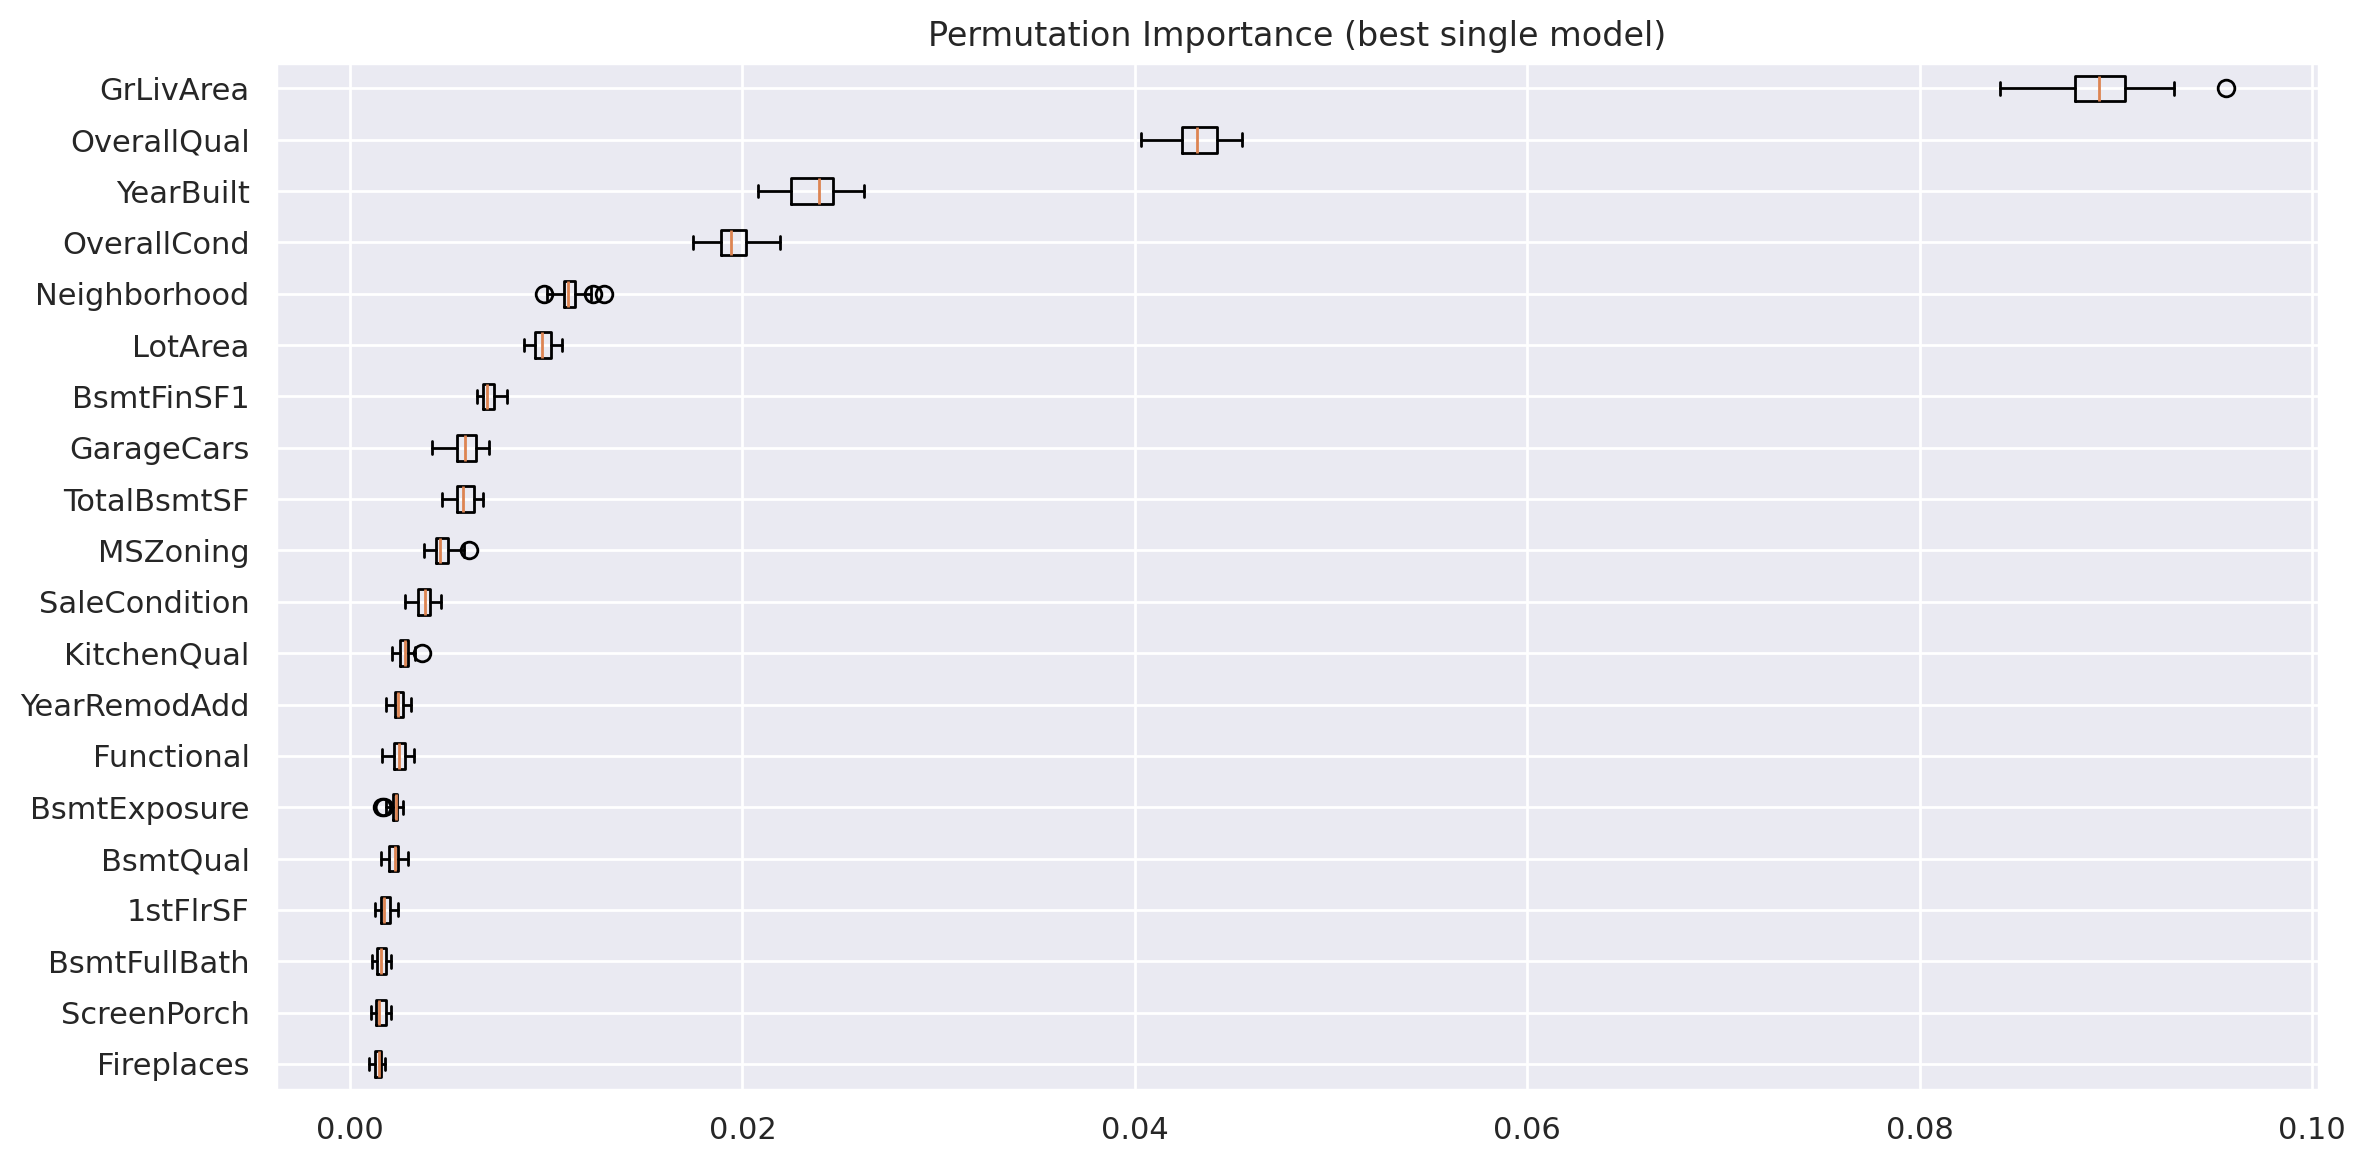

In [131]:
sorted_idx = result.importances_mean.argsort()[-20:]
fig = plt.figure(figsize=(12, 6))
#plt.subplot(1, 1)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=data_X.columns[sorted_idx])
plt.title("Permutation Importance (best single model)")
fig.tight_layout()
plt.show()

In [132]:
%%capture
result = permutation_importance(stacking_reg, test_X, test_y, scoring='neg_root_mean_squared_error', n_repeats=20)

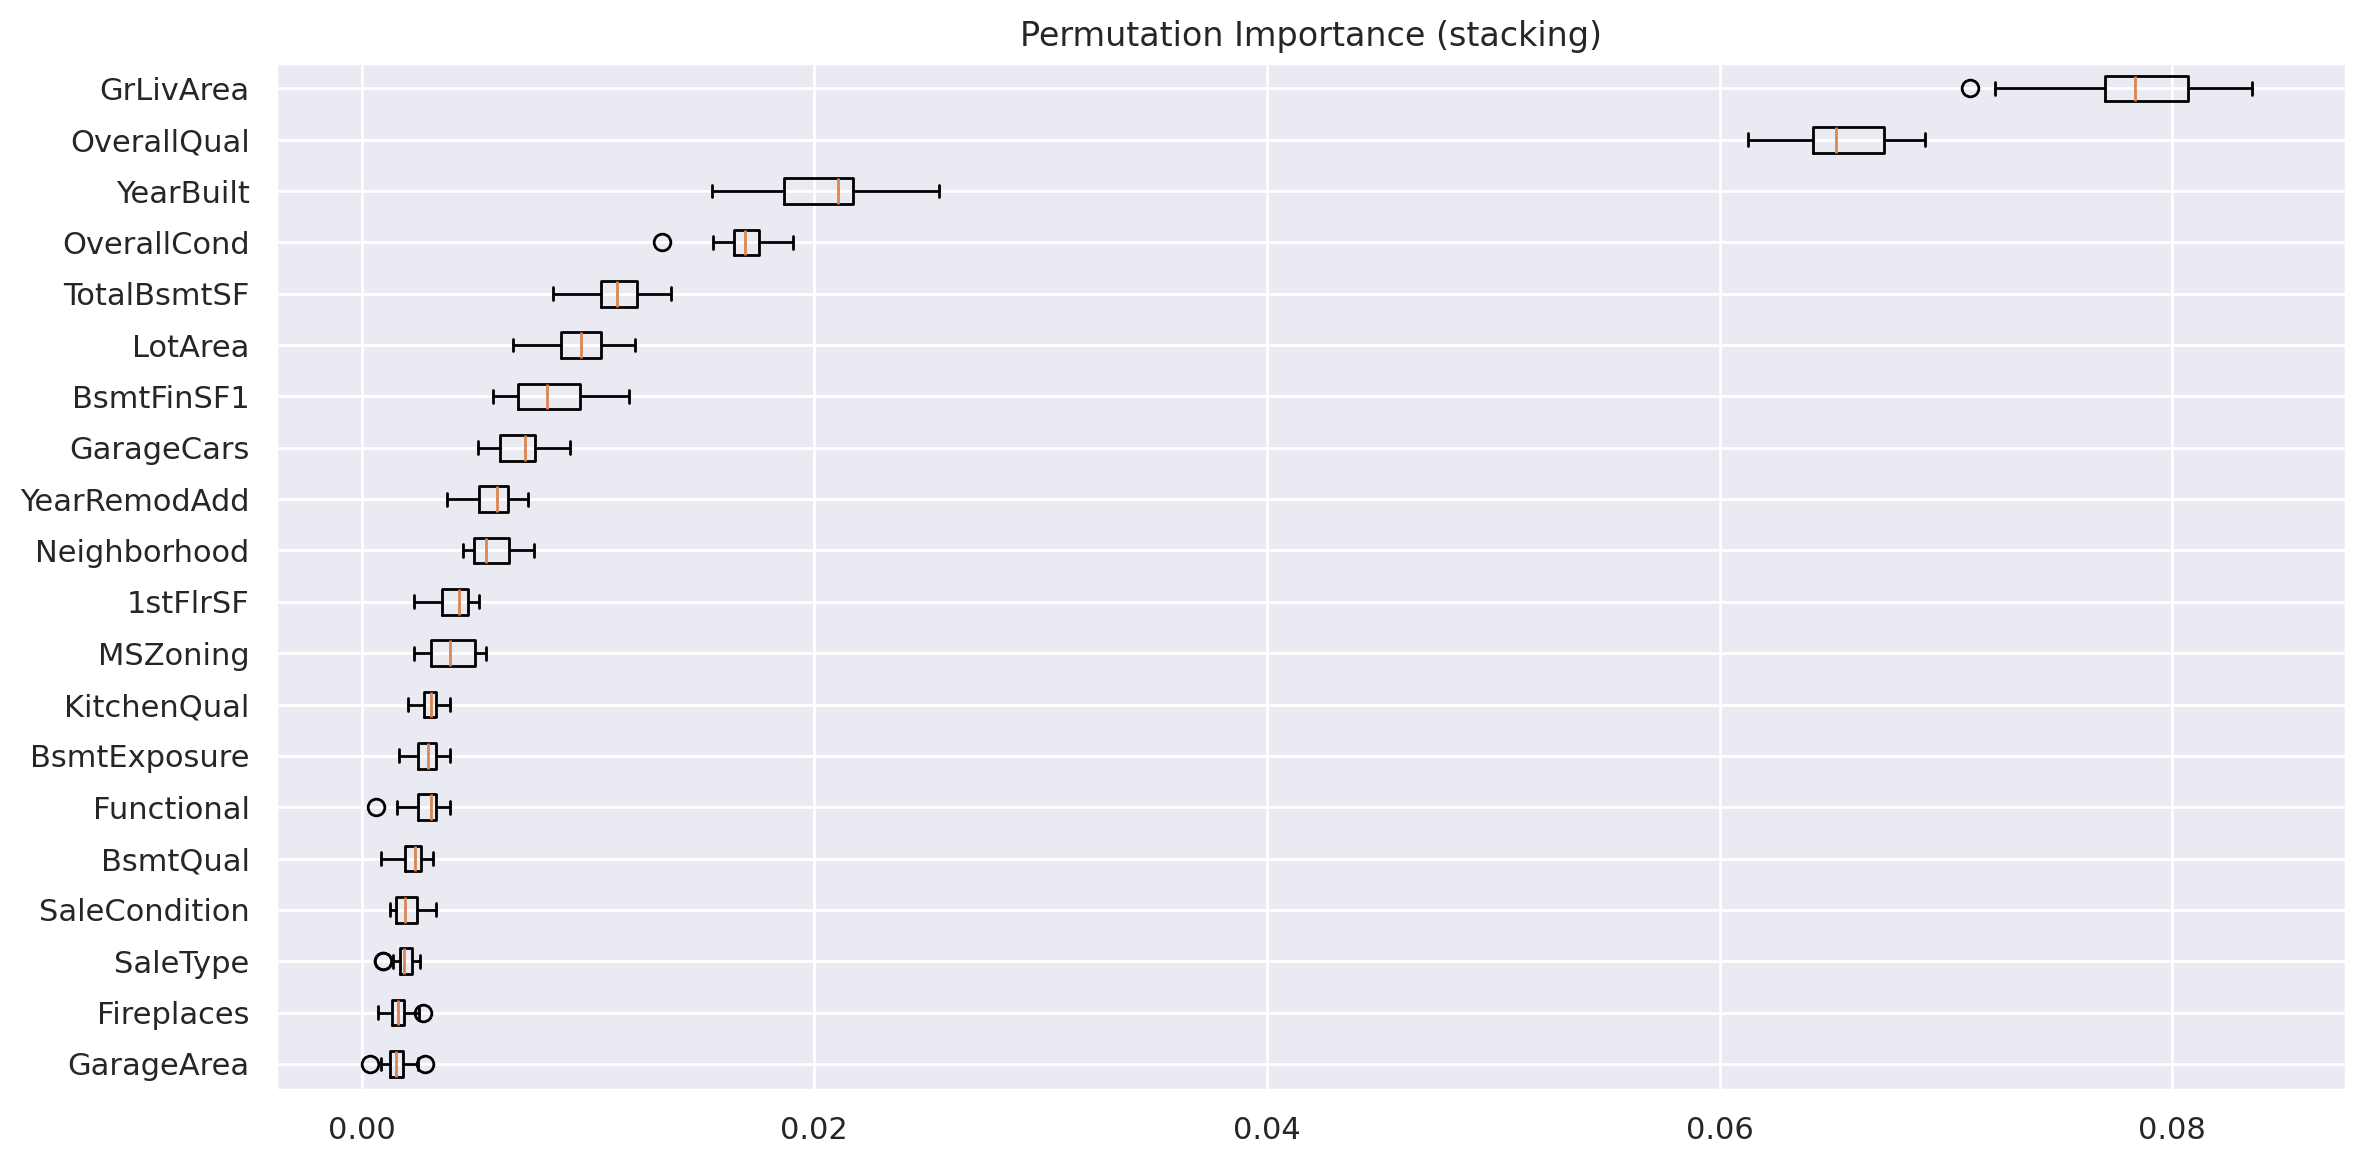

In [133]:
sorted_idx = result.importances_mean.argsort()[-20:]
fig = plt.figure(figsize=(12, 6))
#plt.subplot(1, 1)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=data_X.columns[sorted_idx])
plt.title("Permutation Importance (stacking)")
fig.tight_layout()
plt.show()